# (Test) Expected number of applicants

In this notebook I will try to retrieve the expected number of test takers for each school, based on its general characteristics.

In [24]:
import pandas as pd

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

df = pd.read_pickle('../data/process/schools2017.pkl')

#Remove 45 (out of 578) entries where the # of SHSAT Testers is not specified.
df = df[df['# SHSAT Testers'].notnull()]

# Retrieve percentage of testers
df['% SHSAT Testers'] = df['# SHSAT Testers'] / df['# Students Grade 8']

df.head()

,School Name,Borough,Charter School,Economic Need Index,% Female,% Male,% Asian,% Black,% Hispanic,% Multiple Race Categories Not Represented,% White,% Students with Disabilities,% English Language Learners,% Poverty,Number Tested - ELA,Mean Scale Score - ELA,# Level 1 - ELA,% Level 1 - ELA,# Level 2 - ELA,% Level 2 - ELA,# Level 3 - ELA,% Level 3 - ELA,# Level 4 - ELA,% Level 4 - ELA,# Level 3+4 - ELA,% Level 3+4 - ELA,Number Tested - Math,Mean Scale Score - Math,# Level 1 - Math,% Level 1 - Math,# Level 2 - Math,% Level 2 - Math,# Level 3 - Math,% Level 3 - Math,# Level 4 - Math,% Level 4 - Math,# Level 3+4 - Math,% Level 3+4 - Math,# Students Grade 8,# SHSAT Testers,% SHSAT Testers
DBN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01M034,P.S. 034 Franklin D. Roosevelt,Manhattan,0,0.939015,0.450450,0.549550,0.033033,0.318318,0.612613,0.009009,0.027027,0.366366,0.075075,0.975976,54,298.2778,9.0,16.666670,32.0,59.25926,12.0,22.22222,1.0,1.851852,13.0,24.07407,52,285.9423,27.0,51.923080,18.0,34.61538,7.0,13.461540,0.0,0.000000,7.0,13.46154,58,6.0,0.103448
01M140,P.S. 140 Nathan Straus,Manhattan,0,0.905606,0.490566,0.509434,0.056604,0.123989,0.787062,0.005391,0.026954,0.309973,0.097035,0.873315,55,297.4545,9.0,16.363640,33.0,60.00000,12.0,21.81818,1.0,1.818182,13.0,23.63636,57,291.2456,27.0,47.368420,22.0,38.59649,8.0,14.035090,0.0,0.000000,8.0,14.03509,66,6.0,0.090909
01M184,P.S. 184m Shuang Wen,Manhattan,0,0.639987,0.498538,0.501462,0.694444,0.036550,0.134503,0.061404,0.073099,0.165205,0.150585,0.675439,81,330.1358,4.0,4.938272,17.0,20.98765,32.0,39.50617,28.0,34.567900,60.0,74.07407,83,339.6988,8.0,9.638554,14.0,16.86747,24.0,28.915660,37.0,44.578310,61.0,73.49398,87,67.0,0.770115
01M301,"Technology, Arts, and Sciences Studio",Manhattan,0,0.833962,0.452830,0.547170,0.037736,0.320755,0.547170,0.037736,0.056604,0.424528,0.028302,0.820755,41,304.7073,7.0,17.073170,19.0,46.34146,13.0,31.70732,2.0,4.878049,15.0,36.58537,41,288.1951,20.0,48.780490,15.0,36.58537,5.0,12.195120,1.0,2.439024,6.0,14.63415,51,11.0,0.215686
01M332,University Neighborhood Middle School,Manhattan,0,0.844232,0.433498,0.566502,0.088670,0.231527,0.630542,0.009852,0.039409,0.443350,0.054187,0.876847,61,296.6557,17.0,27.868850,28.0,45.90164,11.0,18.03279,5.0,8.196721,16.0,26.22951,59,281.7119,34.0,57.627120,18.0,30.50847,5.0,8.474576,2.0,3.389831,7.0,11.86441,69,13.0,0.188406


/home/andre/miniconda3/envs/passnyc/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


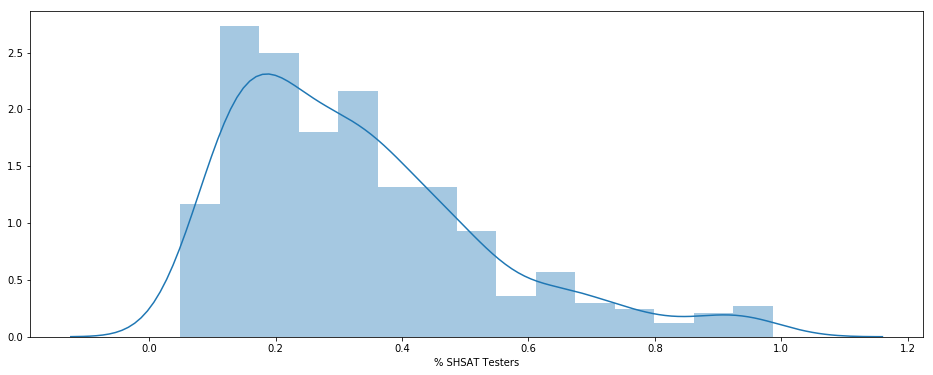

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))
sns.distplot(df['% SHSAT Testers']);

# that's a long tail ...

In [51]:
columns = [
    # use as is
    'Charter School',
    
    'Economic Need Index',    
    '% Poverty',
    
    '% Female',
    
    '% Asian',
    '% Black',
    '% Hispanic',
    '% Multiple Race Categories Not Represented',
    
    '% Students with Disabilities',
    '% English Language Learners',
    
    'Mean Scale Score - ELA',
#     '% Level 1 - ELA',
#     '% Level 2 - ELA',
#     '% Level 3 - ELA',
#     '% Level 4 - ELA',
    
    'Mean Scale Score - Math',
#     '% Level 1 - Math',
#     '% Level 2 - Math',
#     '% Level 3 - Math',
#     '% Level 4 - Math',
    
    # preprocess
#     'Borough',
    
    # drop
#     'School Name',    
    
#     '% Male',
    
#     '% White',

#     'Number Tested - ELA',
#     '% Level 3+4 - ELA',
#     '# Level 1 - ELA',
#     '# Level 2 - ELA',
#     '# Level 3 - ELA',
#     '# Level 4 - ELA',
#     '# Level 3+4 - ELA',

#     'Number Tested - Math',
#     '% Level 3+4 - Math',
#     '# Level 1 - Math',
#     '# Level 2 - Math',
#     '# Level 3 - Math',
#     '# Level 4 - Math',
#     '# Level 3+4 - Math',
    
#     '# Students Grade 8',
#     '# SHSAT Testers',
#     '% SHSAT Testers'
]

import numpy as np
from scipy.special import logit

inputs = df[columns]
targets = logit(df['% SHSAT Testers'])

/home/andre/miniconda3/envs/passnyc/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


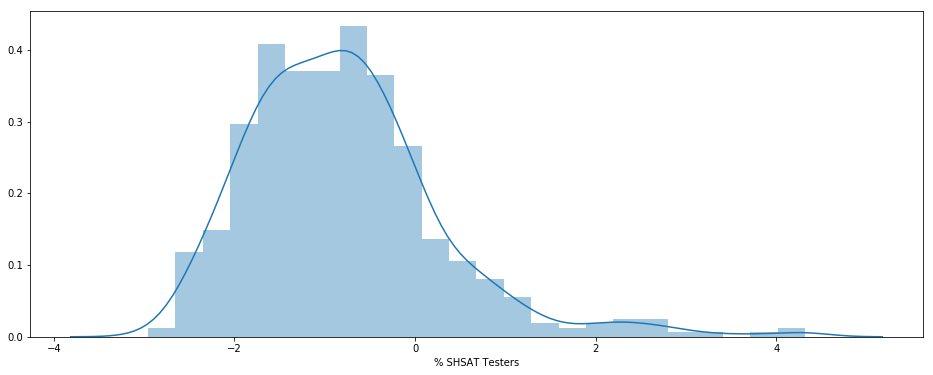

In [52]:
plt.figure(figsize=(16, 6))
sns.distplot(targets);  # this looks... better  -- maybe bimodal

Score: 0.60387209263589


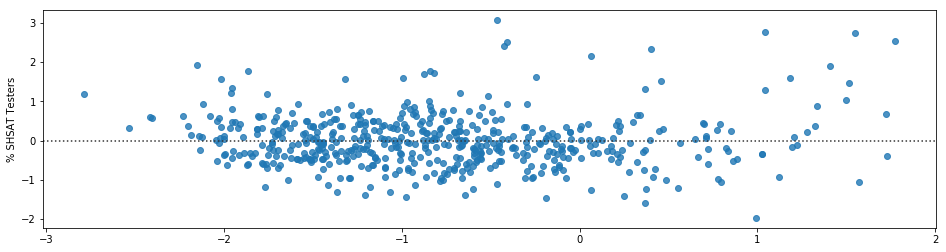

In [53]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(inputs, targets)
values = model.predict(inputs)

plt.figure(figsize=(16, 4))
sns.residplot(values, targets)

pd.Series(model.coef_, index=inputs.columns).sort_values()

print("Score:", model.score(inputs, targets))

Niiiice...

Now converting back to percentages...

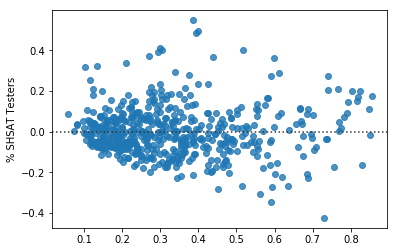

In [54]:
from scipy.special import expit

targets_p = expit(targets)
values_p = expit(values)

sns.residplot(values_p, targets_p)

# still niiice

Now back to amount of students:

(-20, 20)

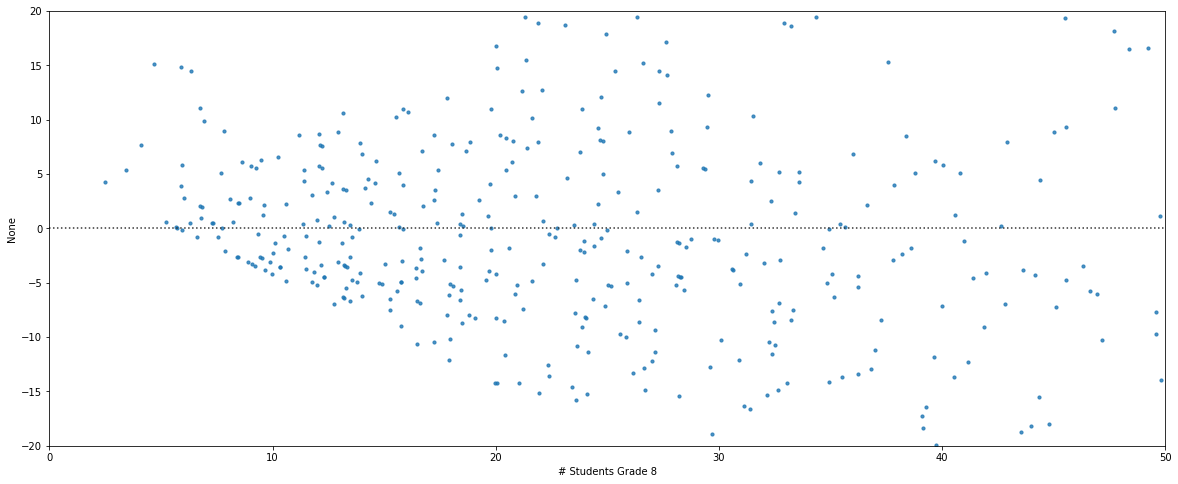

In [64]:
targets_n = targets_p * df['# Students Grade 8']
values_n = values_p * df['# Students Grade 8']

plt.figure(figsize=(20, 8))
sns.residplot(values_n, targets_n, scatter_kws={'s': 10})

plt.xlim(0, 50)
plt.ylim(-20, 20)

(0, 100)

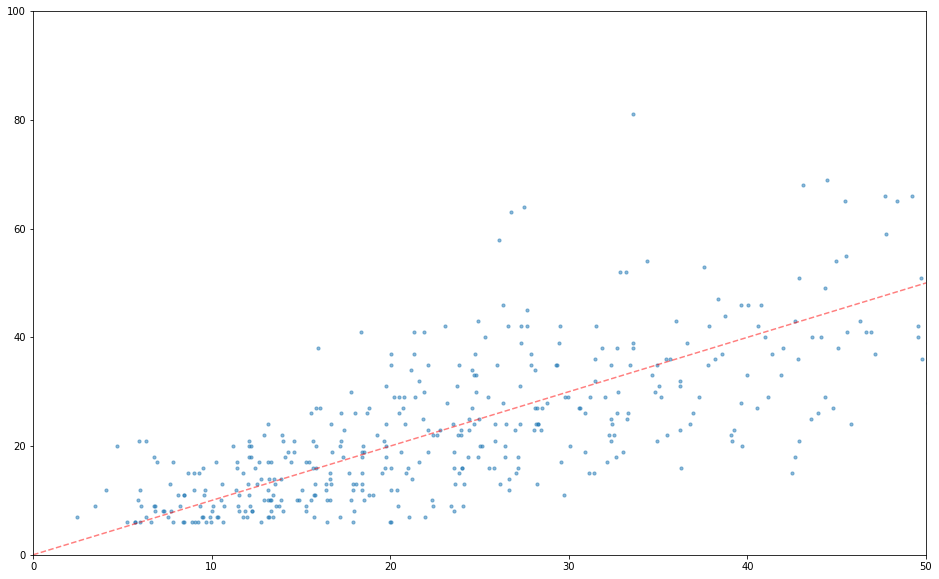

In [75]:
plt.figure(figsize=(16, 10))
plt.plot([0, 500], [0, 500], '--', alpha=0.5, color='red')
plt.scatter(values_n, targets_n, s=10, alpha=0.5)
plt.xlim(0, 50)
plt.ylim(0, 100)

## Conclusion 1

I may need a better model... So I can catch those freaking outliers

## Conclusion 2

Some of our variables are extremely correlated, so the simulation approach may be somewhat good... Let's test it

## Conclusion 3

The model shows promise!